<a href="https://colab.research.google.com/github/islanicolas/Data-Science-Coderhouse/blob/Segunda-Pre-Entrega-Proy-Final/Segunda_PreEntrega_Proyecto_Final_Isla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caso de Estudio** #


## <font color='red'>Análisis de recursos del Aeroparque Jorge Newbery ✈

**Objetivo:**
Analizar y **determinar** puntos críticos de saturación de recursos aeroportuarios.

##Descripción de Contexto

>**Contexto empresarial.**

Dada la excelente ubicación geográfica (a minutos de Capital Federal), el Aeropuerto Jorge Newbery es estretégico para la explotación de empresas aéreas tanto domésticas o internacionales. Luego de la pandemia del Covid 19 se decretó que el mismo volvería a ser un aeropuerto internacional (destinos del Mercosur y países de Sudamérica). Es por esto, que se han incrementado exponencialmente sus operaciones y su infraestructura para soportar este incremento no ha acompañado. 
Durante la pandemia se recontruyó la única pista que este aeródormo posee, pero esa obra no es suficiente, ya que la terminal de pasajeros ha permanecido prácticamente sin grandes incrementos de su capacidad.
Se realizará el estudio de los datos provistos por el explotador aéreo  existente a fin de prever los picos de capacidad de todos los subsistemas que integran al aeropuerto en sí y así evitar saturaciones de los mismos, permitiendo una mejor planificación de los recursos aeroportuarios.



>**Problema comercial**

Se procederá a formatear los datos existentes y proporcionar visualizaciones que respondan las siguientes preguntas:

* Cantidad de arribos por mes
* Cantidad de Pasajeros por mes
* Distribución de arribos por día y frecuencia
* Distribucion de vuelos provenientes de Brasil
* Se pueden predecir demoras por ruta?
* Durante un año, qué cabecera es la que más se utilizó? y qué posición?
* Hay zonas geográficas que tienden a tener más demoras que otras?
* Cuáles son los horarios picos de pasajeros en la terminal?


**Contexto analítico.** 

Se proporciona un archivo CSV  que contiene datos de vuelos entre los años 2019 y  septiembre del 2022 inclusive. Cuenta con información de cantidad de pasajeros, horas de arribo y de programación, etc.

Se adiciona un detaset con información de aeropuertos para complementar el análisis.




## **Exploracion de datos (EDA)** 🔍

###<font color='blue'>Librerías 📚

In [1]:
!pip install -q pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import seaborn as sns 
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from statsmodels.stats.proportion import proportions_ztest 
from scipy import stats 
import pingouin as pg
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier  #arbol de decision
from sklearn import tree #arbol de decision
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
import missingno as msno

Mounted at /content/drive


In [3]:
# Importamos el Dataset
df_Vuelos = pd.read_csv('/content/drive/MyDrive/Cursos/CODERHOUSE/DataSet_Proyecto_Final_Data_Science.csv', sep=";")
#df_Vuelos = pd.read_csv('/content/drive/MyDrive/CODERHOUSE/DataSet_Proyecto_Final_Data_Science.csv', sep=";")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


###<font color='blue'>Exploración y limpieza del Dataset ⚒

**Columnas:**
* Aero: Aerolinea
* Vuelo
* Cshare: Código compartido (un vuelo puede ser realizado por empresas del mismo holding)
* Origen: Ruta del vuelo
* Via: Escala del vuelo
* STA: Horario programado de arribo
* Sug: Horario sugerido
* ETA: Estimated Time Arrival
* ATA: Actual Time Arrival
* Tipo: Codificación del tipo de vuelo
* Asignar:
* Pos: Posición asignada al arribo
* Ter: Terminal en que opera el arribo
* Sec: sector asociado a la terminal
* Rmk: Remark (Estado del vuelo)
* Cin: Cinta asignada para retirar equipajes
* L&F: Mostrador de reclamos de equipajes asignado al vuelo
* Pax: Cantidad de pasajeros
* Vip: si tiene o no pasajeros vip ese vuelo
* Mat: MAtricula de la aeronave
* Acft: Tipo de aeronave
* Obs.: Observaciones
* Aero: empresa aerea asociada a la partida
* #Rot: Vuelo asociado a la partida
* Cabecera: Cabecera de pista donde operó el arribo
* año: año de operación del vuelo
* mes: mes de operación del vuelo
* Hora: hora de operación del vuelo



In [4]:
df_Vuelos.head(5) # Traemos la cabecera del DS

,Aero,#Vuelo,CShare,Origen,Via,STA,SUG,ETA,ATA,Tipo,...,Vip,Mat,Acft,Obs.,Aero.1,#Rot,Cabecera,año,mes,hora
0,DN,6049,NaN,IGR,NaN,1/1/2019 01:50,NaN,NaN,1/1/2019 01:22,1 C P,...,NaN,LVHQH,738,NaN,DN,6062,31.0,2019,1,1
1,4M,7623,NaN,COR,NaN,1/1/2019 06:17,NaN,05:50,1/1/2019 06:02,1 C P,...,NaN,LVBFO,320,NaN,4M,7502,31.0,2019,1,6
2,4M,7653,NaN,MDZ,NaN,1/1/2019 07:37,NaN,07:30,1/1/2019 07:30,1 C P,...,NaN,LVGLP,320,NaN,4M,7550,13.0,2019,1,7
3,AR,1671,NaN,NQN,NaN,1/1/2019 07:40,NaN,07:29,1/1/2019 07:26,1 C P,...,NaN,LVFUA,738W,NaN,AR,1672,13.0,2019,1,7
4,AR,1611,NaN,MDQ,NaN,1/1/2019 07:55,NaN,07:45,1/1/2019 07:43,1 C P,...,NaN,LVGVA,738W,NaN,AR,1496,13.0,2019,1,7


In [5]:
df_Vuelos.dtypes # Verificamos los tipos de datos de cada columna

Aero         object
#Vuelo       object
CShare      float64
Origen       object
Via          object
STA          object
SUG         float64
ETA          object
ATA          object
Tipo         object
Asignar     float64
Pos          object
Ter          object
Sec          object
Rmk          object
Cin          object
L&F         float64
Pax         float64
Vip          object
Mat          object
Acft         object
Obs.         object
Aero.1       object
#Rot         object
Cabecera    float64
año           int64
mes           int64
hora          int64
dtype: object

In [6]:
df_Vuelos.info() # Vemos un pantallazo de tipo de datos y nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127929 entries, 0 to 127928
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Aero      127929 non-null  object 
 1   #Vuelo    127929 non-null  object 
 2   CShare    0 non-null       float64
 3   Origen    127929 non-null  object 
 4   Via       778 non-null     object 
 5   STA       127929 non-null  object 
 6   SUG       0 non-null       float64
 7   ETA       100446 non-null  object 
 8   ATA       125588 non-null  object 
 9   Tipo      127929 non-null  object 
 10  Asignar   0 non-null       float64
 11  Pos       125598 non-null  object 
 12  Ter       127817 non-null  object 
 13  Sec       115477 non-null  object 
 14  Rmk       127929 non-null  object 
 15  Cin       113648 non-null  object 
 16  L&F       189 non-null     float64
 17  Pax       125560 non-null  float64
 18  Vip       98 non-null      object 
 19  Mat       125738 non-null  object 
 20  Acft

Borrado de Duplicados

In [7]:
print(df_Vuelos.shape) # Verifico líneas orginales
df_Vuelos=df_Vuelos.drop_duplicates() # Borro duplicados 
print(df_Vuelos.shape) # Verifico líneas al final para saber si hubo cambios

(127929, 28)
(127929, 28)


Reviso valores nulos


In [8]:
serie=(df_Vuelos.isnull().sum()/df_Vuelos.shape[0])*100 #porcentaje de nulos por columna
serie=serie.sort_values(ascending=False)
serie[serie>0]

Asignar     100.000000
CShare      100.000000
SUG         100.000000
Vip          99.923395
L&F          99.852262
Obs.         99.515356
Via          99.391850
ETA          21.483010
Cin          11.163223
Sec           9.733524
Pax           1.851808
ATA           1.829921
#Rot          1.822104
Aero.1        1.822104
Pos           1.822104
Cabecera      1.797872
Mat           1.712669
Ter           0.087549
dtype: float64

In [9]:
df_Vuelos['ETA'].isnull()

0          True
1         False
2         False
3         False
4         False
          ...  
127924    False
127925     True
127926    False
127927    False
127928    False
Name: ETA, Length: 127929, dtype: bool

Estrategia 
1.   Borro columnas con muy pocos datos
2.   Reemplazo ETA y ATA por STA
3.   Reemplazo Valores nulos

In [10]:
serie1=['Asignar','CShare','SUG','Vip','L&F','Obs.','Via']
df_Vuelos=df_Vuelos.drop(labels=serie1, axis=1)# Borrando las columnas en series1
df_Vuelos.columns

Index(['Aero', '#Vuelo', 'Origen', 'STA', 'ETA', 'ATA', 'Tipo', 'Pos', 'Ter',
       'Sec', 'Rmk', 'Cin', 'Pax', 'Mat', 'Acft', 'Aero.1', '#Rot', 'Cabecera',
       'año', 'mes', 'hora'],
      dtype='object')

In [11]:
df_Vuelos.dropna(subset=['Cabecera'] , inplace=True) # Se borran porque son vuelos que no operaron en AEP
df_Vuelos.dropna(subset=['ATA'] , inplace=True) # Se borran porque son vuelos que no operaron en AEP

In [12]:
df_Vuelos['ETA']=df_Vuelos['ETA'].fillna(df_Vuelos['STA'])
#df_Vuelos['ATA']=df_Vuelos['ATA'].fillna(df_Vuelos['STA'])

In [13]:
df_Vuelos['Pax'].fillna('0', inplace=True)  #Los vuelos CAN o ALT no tienen Pasajeros ya que no operaron en AEP
df_Vuelos['Pos'].fillna('0', inplace=True)  #Los vuelos CAN o ALT no tienen Posición ya que no operaron en AEP
#df_Vuelos['Cabecera'].fillna('0', inplace=True)  #Los vuelos CAN o ALT no tienen Cabecera ya que no operaron en AEP
df_Vuelos['Cin'].fillna('0', inplace=True)  #Los vuelos CAN o ALT no tienen Cinta de Arribo ya que no operaron en AEP
df_Vuelos['Mat'].fillna('N/A', inplace=True)  #Los vuelos CAN o ALT no tienen matrícula ya que no operaron en AEP
df_Vuelos['Aero.1'].fillna('N/A', inplace=True)  #Los vuelos CAN o ALT no tienen cia asociada a la partida ya que no operaron en AEP
df_Vuelos['#Rot'].fillna('N/A', inplace=True)  #Los vuelos CAN o ALT no tienen vuelo asicuado a la partida ya que no operaron en AEP
df_Vuelos['Ter'].fillna('N/A', inplace=True) 
df_Vuelos['Sec'].fillna('N/A', inplace=True) 

In [14]:
df_Vuelos.isna().sum().max()# Verifico que no me quedan valores nulos

0

In [15]:
df_Vuelos.dtypes

Aero         object
#Vuelo       object
Origen       object
STA          object
ETA          object
ATA          object
Tipo         object
Pos          object
Ter          object
Sec          object
Rmk          object
Cin          object
Pax          object
Mat          object
Acft         object
Aero.1       object
#Rot         object
Cabecera    float64
año           int64
mes           int64
hora          int64
dtype: object

In [16]:
# Corrijo tipos de datos que necesito para analizar
df_Vuelos.STA = pd.to_datetime(df_Vuelos.STA,dayfirst=True)
df_Vuelos.ETA = pd.to_datetime(df_Vuelos.ETA)
df_Vuelos.ATA = pd.to_datetime(df_Vuelos.ATA,dayfirst=True)
df_Vuelos.Pax = pd.to_numeric(df_Vuelos.Pax)

In [17]:
df_Vuelos.dtypes # Verifico los cambios realizados

Aero                object
#Vuelo              object
Origen              object
STA         datetime64[ns]
ETA         datetime64[ns]
ATA         datetime64[ns]
Tipo                object
Pos                 object
Ter                 object
Sec                 object
Rmk                 object
Cin                 object
Pax                float64
Mat                 object
Acft                object
Aero.1              object
#Rot                object
Cabecera           float64
año                  int64
mes                  int64
hora                 int64
dtype: object


### Evolución de cantidad de Vuelos por mes ✈

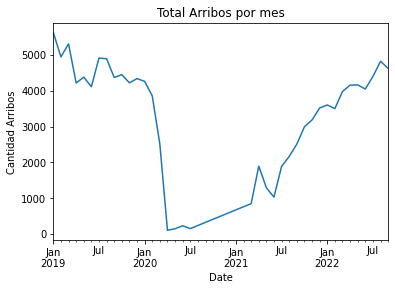

In [18]:
Arribos_mensuales =df_Vuelos.groupby(df_Vuelos['ATA'].dt.to_period('M')).size() 
Arribos_mensuales.plot.line()
plt.title('Total Arribos por mes')
plt.xlabel('Date')
plt.ylabel('Cantidad Arribos')
plt.show()

In [19]:
df_Vuelos_2=df_Vuelos[df_Vuelos['ATA'].dt.month<=7]
df_Resumen=pd.DataFrame(df_Vuelos_2.groupby(df_Vuelos_2['ATA'].dt.to_period('M')).size()) #conteo de vuelos para cada mes
df_Resumen.rename(columns={0:'count'},inplace=True) #cambiando nombre columna
df_Resumen['mes']=df_Resumen.index.month #creando una columna donde este solo el mes
df_Resumen

,count,mes
ATA,,
2019-01,5621,1
2019-02,4945,2
2019-03,5308,3
2019-04,4215,4
2019-05,4377,5
2019-06,4111,6
2019-07,4911,7
2020-01,4260,1
2020-02,3856,2


In [20]:
year_2019=df_Resumen.loc[df_Resumen.index.year==2019,['count','mes']].set_index("mes")
year_2020=df_Resumen.loc[df_Resumen.index.year==2020,['count','mes']].set_index("mes")
year_2021=df_Resumen.loc[df_Resumen.index.year==2021,['count','mes']].set_index("mes")
year_2022=df_Resumen.loc[df_Resumen.index.year==2022,['count','mes']].set_index("mes")



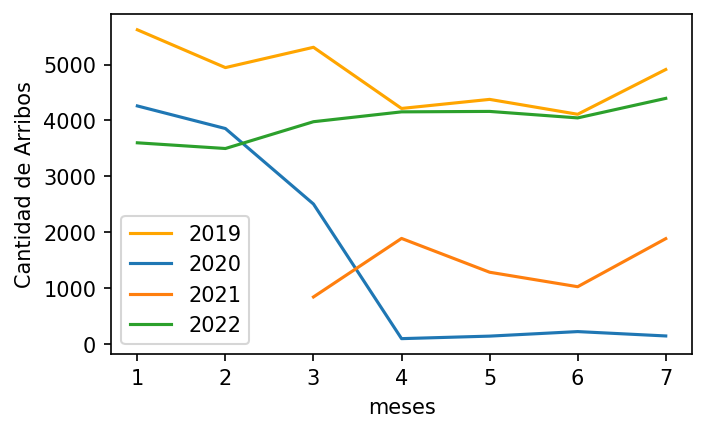

In [21]:
plt.figure(figsize=(5, 3), dpi=150)
  

year_2019['count'].plot(label='2019', color='orange')
year_2020['count'].plot(label='2020')
year_2021['count'].plot(label='2021')
year_2022['count'].plot(label='2022')
  
plt.xlabel('meses')
plt.ylabel('Cantidad de Arribos')
plt.legend()
plt.show()

Conclusiones preliminares:
* La cantidad de vuelos recibidos en el aeropuerto en 2022 aún no superó la de 2019 previo a la pandemia, de forma que **todavía hay capacidad de recursos operativos**
* La **tendencia en 2022 es creciente**, por lo que es necesario anticiparse a la saturación de recursos
* Debido a la pandemia, los años 2020 y 2021 no cuentan con una cantidad de datos suficiente como para analizarlos, por eso se tratará de comparar 2019 y 2022 hasta julio (que es hasta cuando se dispone de datos)

### Evolución de cantidad de Pasajeros 2019 🚻

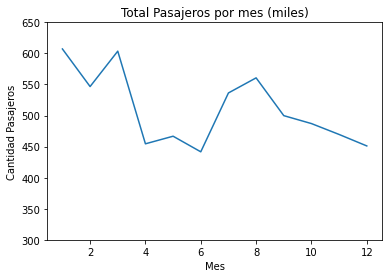

In [22]:
df_Vuelos_4=df_Vuelos[df_Vuelos['ATA'].dt.year ==2019]
df_Vuelos_4.dtypes
Pasajeros_mensuales1 = df_Vuelos_4.groupby("mes")["Pax"].sum()/1000
Pasajeros_mensuales1.plot.line()
plt.title('Total Pasajeros por mes (miles)')
plt.xlabel('Mes')
plt.ylabel('Cantidad Pasajeros')
plt.ylim(300,650)

plt.show()


Podemos observar dos picos en la cantidad de pasajeros coincidentes con los períodos de vacaciones de verano (Enero-Marzo) y vacaciones de invierno (Julio-Agosto)

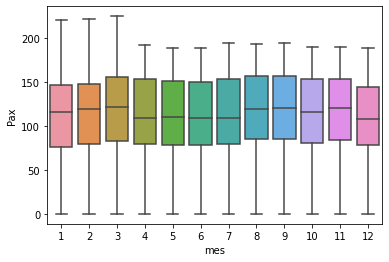

In [23]:
sns.boxplot(data=df_Vuelos_4,x="mes", y="Pax")
plt.show()

La distribución de pasajeros por vuelo es bastante similar entre diferentes meses. En los meses de verano (Enero-Marzo) cuando es el pico de cantidad de pasajeros se observa un poco más de variabilidad (curva más aplanada, bigote más largo) pero la mediana es similar a otros meses.

Se puede inferir que no hay una tendencia de vuelos "más llenos" o "más vacíos" según la época del año.

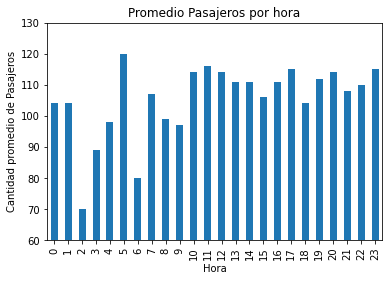

In [24]:
Pasajeros_Hora = df_Vuelos_4.groupby("hora")["Pax"].mean().round()
Pasajeros_Hora.plot.bar()
plt.title('Promedio Pasajeros por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad promedio de Pasajeros')
plt.ylim(60,130)

plt.show()

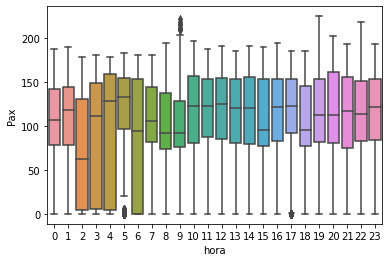

In [25]:
sns.boxplot(data=df_Vuelos_4,x="hora", y="Pax")
plt.show()

### Uso de Cabecera durante año 2019 🚦

Cada pista de aterrizaje tiene 2 cabeceras, según el sentido en la que es utilizada. Dado que el aeroparque en estudio tiene sólo 1 pista, analizaremos la distribución de uso de 2 cabeceras.

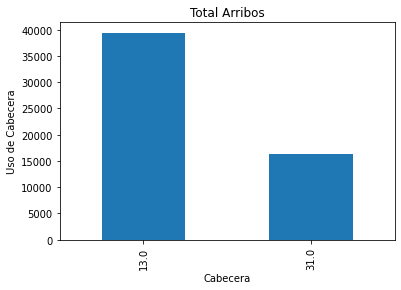

In [26]:
df_Vuelos_Cabecera=df_Vuelos[df_Vuelos['ATA'].dt.year ==2019]
Cabecera = df_Vuelos_Cabecera.groupby("Cabecera")["mes"].size()
Cabecera.plot.bar()
plt.title('Total Arribos')
plt.xlabel('Cabecera')
plt.ylabel('Uso de Cabecera')



plt.show()

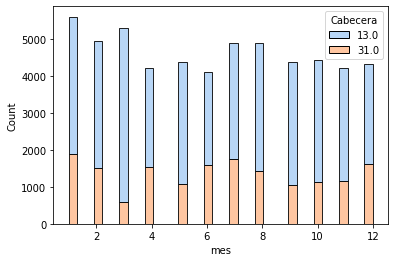

In [27]:
sns.histplot(data=df_Vuelos_Cabecera, 
             x="mes", 
             hue="Cabecera",
             multiple="stack",
             palette="pastel" 
             )
plt.show()

Observamos un marcado uso de la cabecera 13 respecto a la 31. Habría que indagar si hay cuestiones técnicas que influyan en esta tendencia como factores climáticos (ejemplo: orientación de vientos predominantes) o si efectivamente existe una capacidad ociosa en la cabecera 31 que es posible aprovechar.

### Distribución de vuelos por Hora 🕐

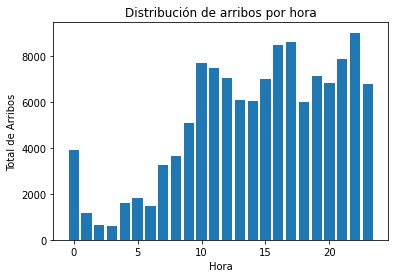

In [28]:
df_Vuelos['HOUR'] = df_Vuelos['ATA'].dt.hour #extrae la hora
arribos_por_dia =df_Vuelos.groupby('HOUR').size()
plt.bar(arribos_por_dia.index,arribos_por_dia.values)
plt.title('Distribución de arribos por hora')
plt.xlabel('Hora')
plt.ylabel('Total de Arribos')
plt.show()

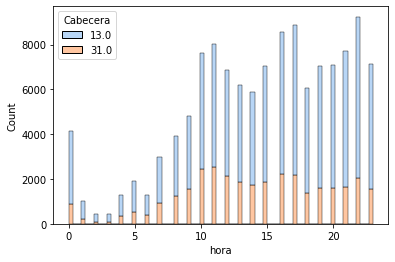

In [29]:
sns.histplot(data=df_Vuelos, 
             x="hora", 
             hue="Cabecera",
             stat = "count",
             multiple="stack",
             palette="pastel"
             )
plt.show()

Se puede observar una gran **capacidad ociosa en turnos de madrugada**, que se va saturando y estabilizando en horarios centrales a lo largo del día.

### Frecuencia diaria de arribos 📅

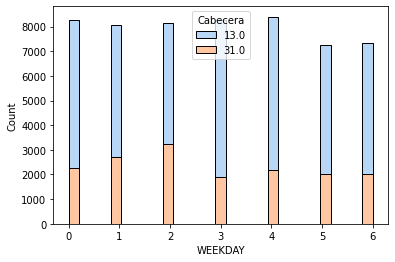

In [30]:
df_Vuelos['WEEKDAY'] = df_Vuelos['ATA'].dt.weekday # Extrae el dia de la semana, con Lunes=0 y Domingo=6
sns.histplot(data=df_Vuelos[df_Vuelos['ATA'].dt.year==2019], 
             x="WEEKDAY", 
             hue="Cabecera",
             stat = "count",
             multiple="stack",
             palette="pastel"
             )
plt.show()

Respecto a la utilización de recursos a lo largo de la semana **no se observan mayores cambios entre días**, siendo bastante estable la ocupación y la proporción de uso de Cabeceras.

### Histograma de Empresas Aéreas ®



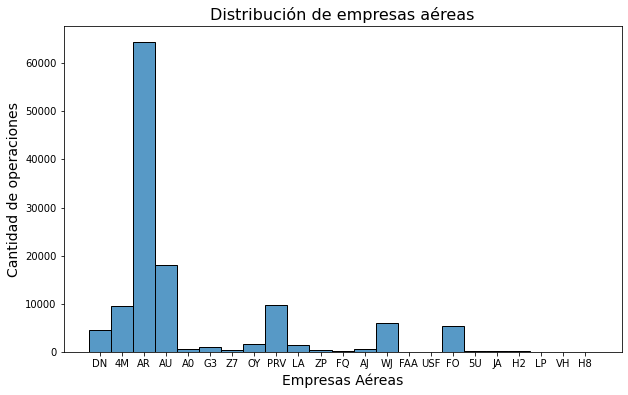

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df_Vuelos['Aero'], bins = 5)
plt.title('Distribución de empresas aéreas', fontsize = 16)
plt.xlabel('Empresas Aéreas', fontsize = 14)
plt.ylabel('Cantidad de operaciones', fontsize = 14)

plt.show()

### Diferencias de horario de Arribo (retrasos) ⏰

  Se desea analizar si hubo retrasos o demoras en la llegada de los vuelos. Para ello se comparan el horario estimado de arribo (STA = Scheduled Time Arrival) con el horario real de arribo (ATA = Actual Time Arrival) y se determina el tiempo de demora en minutos.

In [32]:
df_Vuelos['Convert'] = (df_Vuelos['ATA'])-(df_Vuelos['STA']) # Devuelve un timedelta
df_Vuelos['Demora_Min'] = df_Vuelos['Convert'].dt.seconds.div(60)+df_Vuelos['Convert'].dt.days.multiply(1440) # Convierto el timedelta en minutos
df_Vuelos['Delayed'] = (df_Vuelos['Convert'].dt.seconds.div(60)+df_Vuelos['Convert'].dt.days.multiply(1440))>0 # Convierto el timedelta en booleano
df_Vuelos.Delayed = pd.to_numeric(df_Vuelos.Delayed).astype(int) # Convierto el booleano en un nro entero para poder sumarlo
df_Vuelos[['Delayed','ATA','STA','Convert','Demora_Min']] # Verifico las columnas creadas

,Delayed,ATA,STA,Convert,Demora_Min
0,0,2019-01-01 01:22:00,2019-01-01 01:50:00,-1 days +23:32:00,-28.0
1,0,2019-01-01 06:02:00,2019-01-01 06:17:00,-1 days +23:45:00,-15.0
2,0,2019-01-01 07:30:00,2019-01-01 07:37:00,-1 days +23:53:00,-7.0
3,0,2019-01-01 07:26:00,2019-01-01 07:40:00,-1 days +23:46:00,-14.0
4,0,2019-01-01 07:43:00,2019-01-01 07:55:00,-1 days +23:48:00,-12.0
...,...,...,...,...,...
127924,0,2022-09-30 22:05:00,2022-09-30 22:08:00,-1 days +23:57:00,-3.0
127925,1,2022-09-30 22:32:00,2022-09-30 22:15:00,0 days 00:17:00,17.0
127926,0,2022-09-30 22:02:00,2022-09-30 22:21:00,-1 days +23:41:00,-19.0
127927,0,2022-09-30 23:15:00,2022-09-30 23:25:00,-1 days +23:50:00,-10.0


In [33]:
df_Vuelos.dtypes # Verifico si las columnas creadas tienen los tipos de dato deseados

Aero                   object
#Vuelo                 object
Origen                 object
STA            datetime64[ns]
ETA            datetime64[ns]
ATA            datetime64[ns]
Tipo                   object
Pos                    object
Ter                    object
Sec                    object
Rmk                    object
Cin                    object
Pax                   float64
Mat                    object
Acft                   object
Aero.1                 object
#Rot                   object
Cabecera              float64
año                     int64
mes                     int64
hora                    int64
HOUR                    int64
WEEKDAY                 int64
Convert       timedelta64[ns]
Demora_Min            float64
Delayed                 int64
dtype: object

Se analiza el comportamiento de las demoras para ver si se encuentran concentradas en algún Origen en particular.

In [34]:
(df_Vuelos.groupby('Origen')['Delayed'].sum()/df_Vuelos['Delayed'].sum()).sort_values(ascending=False)# NO me sirve verlo por aeropuerto, son muchos

Origen
BRC    0.094992
COR    0.072105
MDZ    0.068120
USH    0.064646
IGR    0.064136
         ...   
ITO    0.000000
IST    0.000000
IQQ    0.000000
IAH    0.000000
ZRH    0.000000
Name: Delayed, Length: 215, dtype: float64

La cantidad de aerpuertos de origen es muy grande (215 orígenes distintos) y no hay ninguno en particular con demoras muy marcadas (al menos no que se aprecie fácilmente)

Por este motivo se agruparán por país de origen para analizar el comportamiento

### Retrasos por país de origen 🌐

####<font color='blue'>Datasets complementarios 🦾

<font color='green'>Se agregan otros dataset complementarios con información sobre los aeropuertos del mundo para enriquecer el análisis

In [35]:
url = 'https://davidmegginson.github.io/ourairports-data/airports.csv'
df_airports = pd.read_csv(url, index_col=0)
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74758 entries, 6523 to 313629
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ident              74758 non-null  object 
 1   type               74758 non-null  object 
 2   name               74758 non-null  object 
 3   latitude_deg       74758 non-null  float64
 4   longitude_deg      74758 non-null  float64
 5   elevation_ft       60553 non-null  float64
 6   continent          38580 non-null  object 
 7   iso_country        74499 non-null  object 
 8   iso_region         74758 non-null  object 
 9   municipality       69762 non-null  object 
 10  scheduled_service  74758 non-null  object 
 11  gps_code           41058 non-null  object 
 12  iata_code          8869 non-null   object 
 13  local_code         32337 non-null  object 
 14  home_link          3572 non-null   object 
 15  wikipedia_link     10802 non-null  object 
 16  keywords          

In [36]:
url = 'https://davidmegginson.github.io/ourairports-data/countries.csv'
df_country = pd.read_csv(url, index_col=0)
df_country.rename(columns={'code':'iso_country'},inplace=True) # Se cambia el nombre de las columnas para hacerlas coincidir con el DF en estudio
df_country.rename(columns={'name':'country'},inplace=True) # Se cambia el nombre de las columnas para hacerlas coincidir con el DF en estudio
df_country.head(5)

,iso_country,country,continent,wikipedia_link,keywords
id,,,,,
302672,AD,Andorra,EU,https://en.wikipedia.org/wiki/Andorra,Andorran airports
302618,AE,United Arab Emirates,AS,https://en.wikipedia.org/wiki/United_Arab_Emir...,"UAE,مطارات في الإمارات العربية المتحدة"
302619,AF,Afghanistan,AS,https://en.wikipedia.org/wiki/Afghanistan,NaN
302722,AG,Antigua and Barbuda,NaN,https://en.wikipedia.org/wiki/Antigua_and_Barbuda,Antiguan airports
302723,AI,Anguilla,NaN,https://en.wikipedia.org/wiki/Anguilla,NaN


In [37]:
url = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'
df_region = pd.read_csv(url, index_col=0).reset_index()
df_region.rename(columns={'alpha-2':'iso_country'},inplace=True) # Se cambia el nombre de las columnas para hacerlas coincidir con el DF en estudio
df_region.rename(columns={'name':'country'},inplace=True) # Se cambia el nombre de las columnas para hacerlas coincidir con el DF en estudio
df_region.head(5)

,country,iso_country,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


<font color='green'>Se unen los DF complementarios entre sí para formar uno solo bien completo con información  adicional sobre aeropuertos

In [38]:
df_add1 = pd.merge(left=df_airports,right=df_country, on ='iso_country',how='left')
df_add = pd.merge(left=df_add1,right=df_region, on ='iso_country',how='left')

<AxesSubplot:>

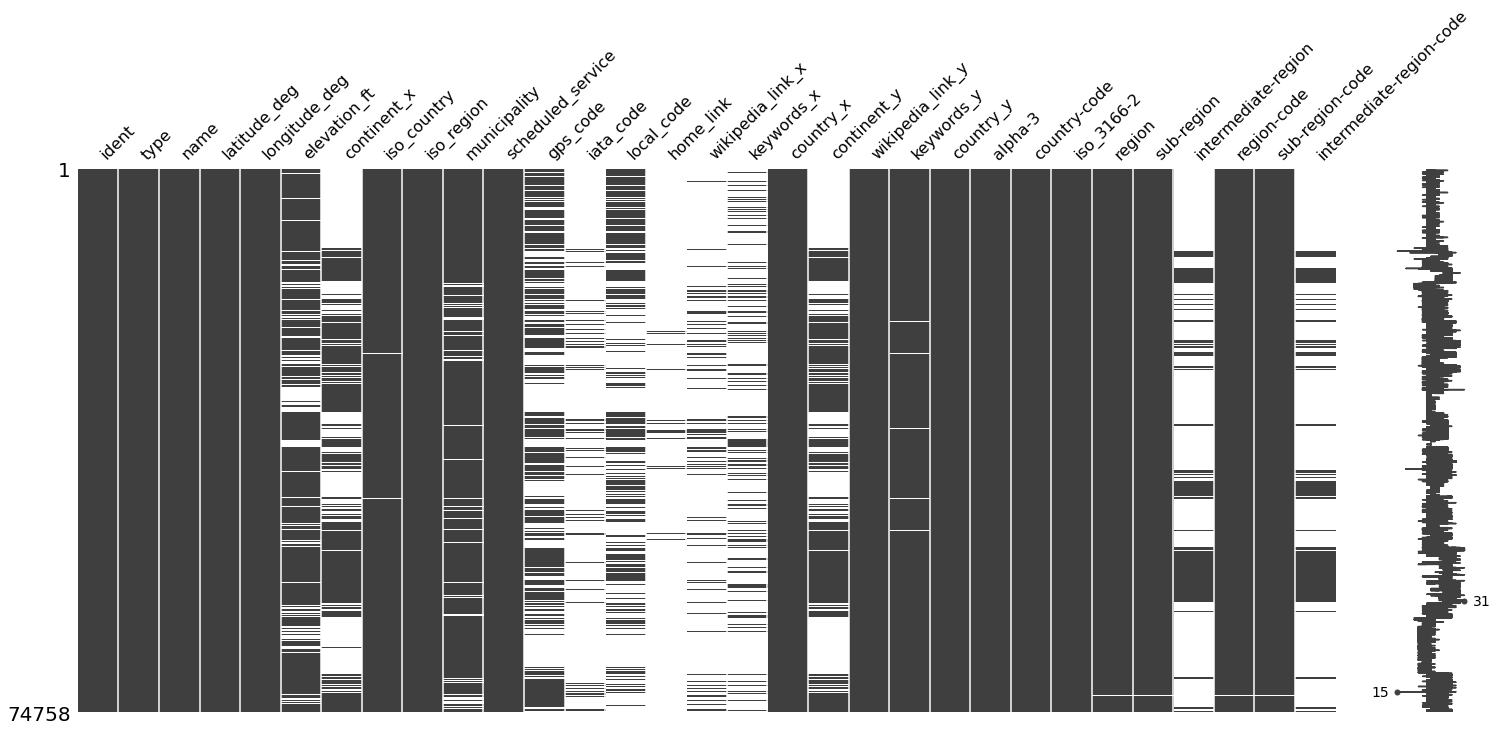

In [39]:
msno.matrix(df_add) #missing data matrix -- Reviso columnas con muchos faltantes que no me sirven

<font color='green'>Se determinan aquellas columnas sin datos faltantes y con información relevante para el análisis; se crea un DF con esta información.

In [40]:
df_aeropuertos = df_add[['iata_code','type','name','municipality','country_x','iso_country','region','sub-region','latitude_deg','longitude_deg','wikipedia_link_x','local_code']]
df_aeropuertos

,iata_code,type,name,municipality,country_x,iso_country,region,sub-region,latitude_deg,longitude_deg,wikipedia_link_x,local_code
0,NaN,heliport,Total Rf Heliport,Bensalem,United States,US,Americas,Northern America,40.070801,-74.933601,NaN,00A
1,NaN,small_airport,Aero B Ranch Airport,Leoti,United States,US,Americas,Northern America,38.704022,-101.473911,NaN,00AA
2,NaN,small_airport,Lowell Field,Anchor Point,United States,US,Americas,Northern America,59.947733,-151.692524,NaN,00AK
3,NaN,small_airport,Epps Airpark,Harvest,United States,US,Americas,Northern America,34.864799,-86.770302,NaN,00AL
4,NaN,small_airport,Katmai Lodge Airport,King Salmon,United States,US,Americas,Northern America,59.093287,-156.456699,NaN,00AN
...,...,...,...,...,...,...,...,...,...,...,...,...
74753,NaN,heliport,Sealand Helipad,Sealand,United Kingdom,GB,Europe,Northern Europe,51.894444,1.482500,https://en.wikipedia.org/wiki/Principality_of_...,NaN
74754,NaN,small_airport,Glorioso Islands Airstrip,Grande Glorieuse,French Southern and Antarctic Lands,TF,Africa,Sub-Saharan Africa,-11.584278,47.296389,NaN,NaN
74755,NaN,small_airport,Fainting Goat Airport,Blum,United States,US,Americas,Northern America,32.110587,-97.356312,NaN,87TX
74756,NaN,closed,Scandium City Heliport,(Old) Scandium City,Canada,CA,Americas,Northern America,69.355287,-138.939310,NaN,NaN


<font color='green'>Se monta el nuevo DF complementario sobre el original

In [41]:
df_aeropuertos.rename(columns={'iata_code':'Origen'},inplace=True)
df_Vuelos = pd.merge(left=df_Vuelos,right=df_aeropuertos, on ='Origen',how='left')
df_Vuelos.info()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<class 'pandas.core.frame.DataFrame'>
Int64Index: 125582 entries, 0 to 125581
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Aero              125582 non-null  object         
 1   #Vuelo            125582 non-null  object         
 2   Origen            125582 non-null  object         
 3   STA               125582 non-null  datetime64[ns] 
 4   ETA               125582 non-null  datetime64[ns] 
 5   ATA               125582 non-null  datetime64[ns] 
 6   Tipo              125582 non-null  object         
 7   Pos               125582 non-null  object         
 8   Ter               125582 non-null  object         
 9   Sec               125582 non-null  object         
 10  Rmk               125582 non-null  object         
 11  Cin               125582 non-null  object         
 12  Pax               125582 non-null  float64        
 13  Mat               125582 non-null  object   

####Exploración por Origen 🌎

  Con el nuevo DF complementario podemos analizar los vuelos según su país de origen

In [42]:
# Analizo la cantidad de vuelos de cada país respecto al total de vuelos
(df_Vuelos.groupby('country_x')['ATA'].count()/df_Vuelos['ATA'].count()*100).sort_values(ascending=False)

country_x
Argentina                                       86.971859
Uruguay                                          4.073036
Brazil                                           3.853259
Chile                                            1.767769
Paraguay                                         0.816200
Peru                                             0.441942
Bolivia                                          0.281888
Colombia                                         0.124222
United States                                    0.096351
Ecuador                                          0.035833
Spain                                            0.027870
Norway                                           0.023889
Trinidad and Tobago                              0.009556
Cape Verde                                       0.007963
Papua New Guinea                                 0.007167
Dominican Republic                               0.006370
Republic of the Congo                            0.006370
El S

In [43]:
# Analizo el % de vuelos demorados que tiene cada país
(df_Vuelos.groupby('country_x')['Delayed'].sum()/df_Vuelos.groupby('country_x')['Delayed'].count()*100).sort_values(ascending=False)

country_x
Nigeria                                         100.000000
United Kingdom                                  100.000000
France                                          100.000000
Falkland Islands                                100.000000
Sweden                                           50.000000
Cape Verde                                       40.000000
Venezuela                                        40.000000
Ecuador                                          37.777778
Dominican Republic                               37.500000
Republic of the Congo                            37.500000
Spain                                            37.142857
Panama                                           33.333333
Turkey                                           33.333333
Germany                                          33.333333
South Africa                                     33.333333
Chile                                            32.612613
United States                                 

Se puede ver que el **87% de los vuelos son de Argentina** (vuelos domésticos) y poseen un **25% de demoras**, por lo tanto conviene analizar ese Origen

In [44]:
# Creo un nuevo DF para analizar sólo Argentina
df_Arg=df_Vuelos.loc[df_Vuelos.country_x=='Argentina',:]
df_Arg

,Aero,#Vuelo,Origen,STA,ETA,ATA,Tipo,Pos,Ter,Sec,...,name,municipality,country_x,iso_country,region,sub-region,latitude_deg,longitude_deg,wikipedia_link_x,local_code
0,DN,6049,IGR,2019-01-01 01:50:00,2019-01-01 01:50:00,2019-01-01 01:22:00,1 C P,31,A,2,...,Cataratas Del Iguazú International Airport,Puerto Iguazu,Argentina,AR,Americas,Latin America and the Caribbean,-25.737301,-54.473400,https://en.wikipedia.org/wiki/Cataratas_del_Ig...,IGU
1,4M,7623,COR,2019-01-01 06:17:00,2023-03-08 05:50:00,2019-01-01 06:02:00,1 C P,9,A,2,...,Ingeniero Ambrosio Taravella Airport,Cordoba,Argentina,AR,Americas,Latin America and the Caribbean,-31.323601,-64.208000,https://en.wikipedia.org/wiki/Ingeniero_Ambros...,CBA
2,4M,7653,MDZ,2019-01-01 07:37:00,2023-03-08 07:30:00,2019-01-01 07:30:00,1 C P,10,A,2,...,El Plumerillo Airport,Mendoza,Argentina,AR,Americas,Latin America and the Caribbean,-32.831699,-68.792900,https://en.wikipedia.org/wiki/Governor_Francis...,DOZ
3,AR,1671,NQN,2019-01-01 07:40:00,2023-03-08 07:29:00,2019-01-01 07:26:00,1 C P,7,A,2,...,Presidente Peron Airport,Neuquen,Argentina,AR,Americas,Latin America and the Caribbean,-38.949001,-68.155701,https://en.wikipedia.org/wiki/Presidente_Per%C...,NEU
4,AR,1611,MDQ,2019-01-01 07:55:00,2023-03-08 07:45:00,2019-01-01 07:43:00,1 C P,26,A,2,...,Ástor Piazzola International Airport,Mar del Plata,Argentina,AR,Americas,Latin America and the Caribbean,-37.934200,-57.573300,https://en.wikipedia.org/wiki/%C3%81stor_Piazz...,MDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125575,WJ,3189,BRC,2022-09-30 21:42:00,2023-03-08 21:37:00,2022-09-30 21:41:00,1 C P,30,A,N,...,San Carlos De Bariloche Airport,San Carlos de Bariloche,Argentina,AR,Americas,Latin America and the Caribbean,-41.151199,-71.157501,https://en.wikipedia.org/wiki/San_Carlos_de_Ba...,BAR
125577,WJ,3481,SLA,2022-09-30 22:08:00,2023-03-08 22:03:00,2022-09-30 22:05:00,1 C P,17,A,N,...,Martin Miguel De Guemes International Airport,Salta,Argentina,AR,Americas,Latin America and the Caribbean,-24.856001,-65.486198,https://en.wikipedia.org/wiki/Mart%C3%ADn_Migu...,SAL
125579,WJ,3269,COR,2022-09-30 22:21:00,2023-03-08 22:01:00,2022-09-30 22:02:00,1 C P,16,A,N,...,Ingeniero Ambrosio Taravella Airport,Cordoba,Argentina,AR,Americas,Latin America and the Caribbean,-31.323601,-64.208000,https://en.wikipedia.org/wiki/Ingeniero_Ambros...,CBA
125580,FO,5225,TUC,2022-09-30 23:25:00,2023-03-08 23:20:00,2022-09-30 23:15:00,1 C P,66,A,N,...,Teniente Benjamin Matienzo Airport,San Miguel de Tucumán,Argentina,AR,Americas,Latin America and the Caribbean,-26.840900,-65.104897,https://en.wikipedia.org/wiki/Benjam%C3%ADn_Ma...,TUC


In [45]:
# Limpiamos información irrelevante o duplicada
col_del=['HOUR','type','name','country_x','iso_country','region','sub-region','latitude_deg','longitude_deg','wikipedia_link_x']
Arg_Res=df_Arg.drop(labels=col_del, axis=1)
Arg_Res.columns

Index(['Aero', '#Vuelo', 'Origen', 'STA', 'ETA', 'ATA', 'Tipo', 'Pos', 'Ter',
       'Sec', 'Rmk', 'Cin', 'Pax', 'Mat', 'Acft', 'Aero.1', '#Rot', 'Cabecera',
       'año', 'mes', 'hora', 'WEEKDAY', 'Convert', 'Demora_Min', 'Delayed',
       'municipality', 'local_code'],
      dtype='object')

In [46]:
Arg_Res.describe()

,Pax,Cabecera,año,mes,hora,WEEKDAY,Convert,Demora_Min,Delayed
count,109221.000000,109221.000000,109221.00000,109221.000000,109221.000000,109221.000000,109221,109221.000000,109221.000000
mean,116.645572,17.820172,2020.24563,6.048471,14.771207,2.949927,-1 days +23:59:04.679319912,-0.922011,0.253843
std,50.436555,7.970547,1.28298,3.399214,5.795244,1.982914,0 days 00:40:52.026082805,40.867101,0.435211
min,0.000000,13.000000,2019.00000,1.000000,0.000000,0.000000,-1 days +13:20:00,-640.000000,0.000000
25%,86.000000,13.000000,2019.00000,3.000000,11.000000,1.000000,-1 days +23:43:00,-17.000000,0.000000
50%,126.000000,13.000000,2020.00000,6.000000,16.000000,3.000000,-1 days +23:52:00,-8.000000,0.000000
75%,160.000000,31.000000,2022.00000,9.000000,20.000000,5.000000,0 days 00:01:00,1.000000,1.000000
max,203.000000,31.000000,2022.00000,12.000000,23.000000,6.000000,1 days 07:25:00,1885.000000,1.000000


In [47]:
# Analizo los aeropuertos con más cantidad de vuelos demorados
Arg_Res.groupby('municipality')['Delayed'].sum().sort_values(ascending=False)

municipality
San Carlos de Bariloche    2980
Cordoba                    2262
Mendoza                    2137
Ushuaia                    2028
Puerto Iguazu              2012
                           ... 
Necochea                      0
General Pico                  0
Puerto Deseado                0
Puerto Santa Cruz             0
Miramar                       0
Name: Delayed, Length: 62, dtype: int64

In [48]:
# Demora promedio de cada aeropuerto
Arg_Res.groupby('municipality')['Demora_Min'].mean().sort_values(ascending=False)

municipality
Buenos Aires                    86.798246
San Julian                      40.500000
Villa Mercedes                  17.033333
Malargue                        14.642857
Tandil                          11.384615
                                  ...    
Rosario                         -5.888498
Rawson                          -6.428276
Termas de Río Hondo             -7.291367
Viedma / Carmen de Patagones    -7.329749
Rio Cuarto                     -11.078799
Name: Demora_Min, Length: 62, dtype: float64

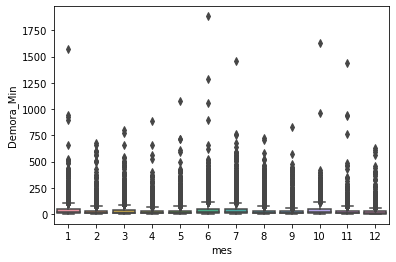

In [49]:
# Visualizo la distribución de los minutos de demoras
sns.boxplot(data=Arg_Res[Arg_Res['Delayed']==1],
            x="mes", 
            y="Demora_Min")
plt.show()

In [50]:
# Vamos a remover los outliers
def removeOutliers(df,col):

    Q3 = np.quantile(df[col], 0.75)
    print('quartil 3 es ', Q3)

    Q1 = np.quantile(df[col], 0.25)
    print('quartil 1 es ',Q1)
    
    IQR = Q3 - Q1
    print('rango intercuartilico es ', IQR)
 
    lower_range = Q1 - 1.5 * IQR
    print('extremo inferior es ', lower_range)

    upper_range = Q3 + 1.5 * IQR
    print('extremo superior es ', upper_range)

    df = df.loc[(df[col] > lower_range) & (df[col] < upper_range),:]

    return df
 
 
Arg_Res1=removeOutliers(Arg_Res,'Demora_Min')

quartil 3 es  1.0
quartil 1 es  -17.0
rango intercuartilico es  18.0
extremo inferior es  -44.0
extremo superior es  28.0


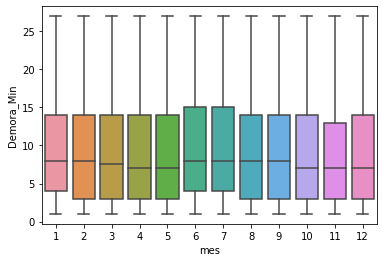

In [51]:
# Vemos la distribución de Minutos de demora
sns.boxplot(data=Arg_Res1[Arg_Res1['Delayed']==1],
            x="mes", 
            y="Demora_Min")
plt.show()

No se observa ningún patrón de Demora que se diferencie según la época del año, la distribución es similar todos los meses

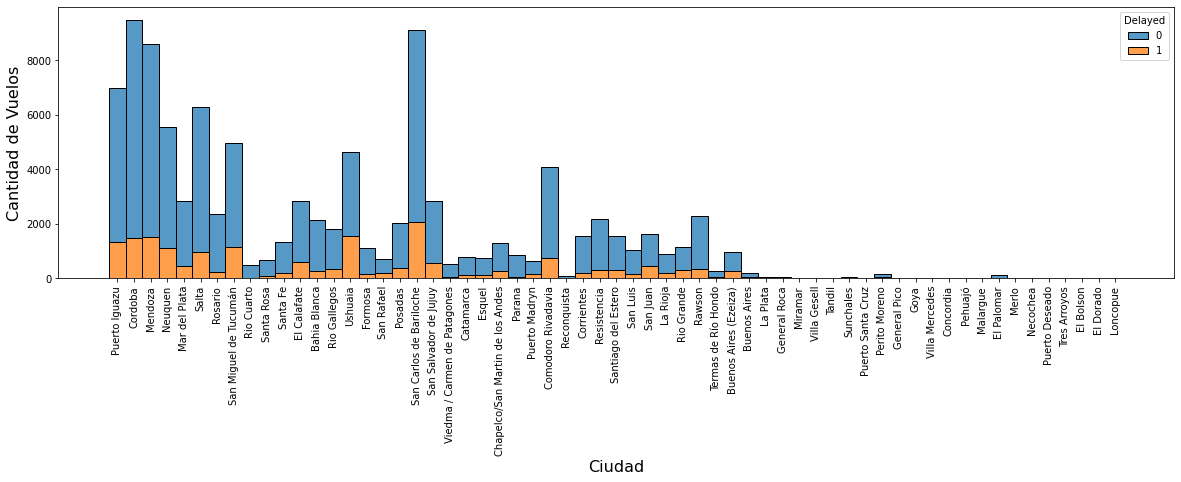

In [52]:
fig, axes= plt.subplots(figsize=(20, 5))
sns.histplot(data=Arg_Res1, 
             x="municipality", 
             hue="Delayed",
             stat = "count",
             multiple="stack",
             )
plt.xlabel('Ciudad', fontsize=16)
plt.ylabel('Cantidad de Vuelos', fontsize=16)
plt.xticks(rotation=90)
plt.show()

####Qué rutas tienen más vuelos a Brasil? 🇧
* GIG: Rio de Janeiro
* GRU: Sao Pablo
* BSB: Brasilia
* CWB: Curitiba
* FLN: Florianopolis
* FOR: Fortaleza
* POA: Porto Alegre

In [53]:
ruta = (df_Vuelos[(df_Vuelos.Origen =='GIG') | (df_Vuelos.Origen=='GRU') | (df_Vuelos.Origen=='BSB')| (df_Vuelos.Origen=='CWB')| (df_Vuelos.Origen=='FLN')| (df_Vuelos.Origen=='FOR')| (df_Vuelos.Origen=='POA')])

In [54]:
df1 = pd.DataFrame({'count': ruta.groupby(['Origen', 'hora']).size()})
df1.reset_index(inplace=True)
df1.head(5)



,Origen,hora,count
0,BSB,0,46
1,BSB,1,8
2,BSB,2,1
3,BSB,3,1
4,BSB,5,2


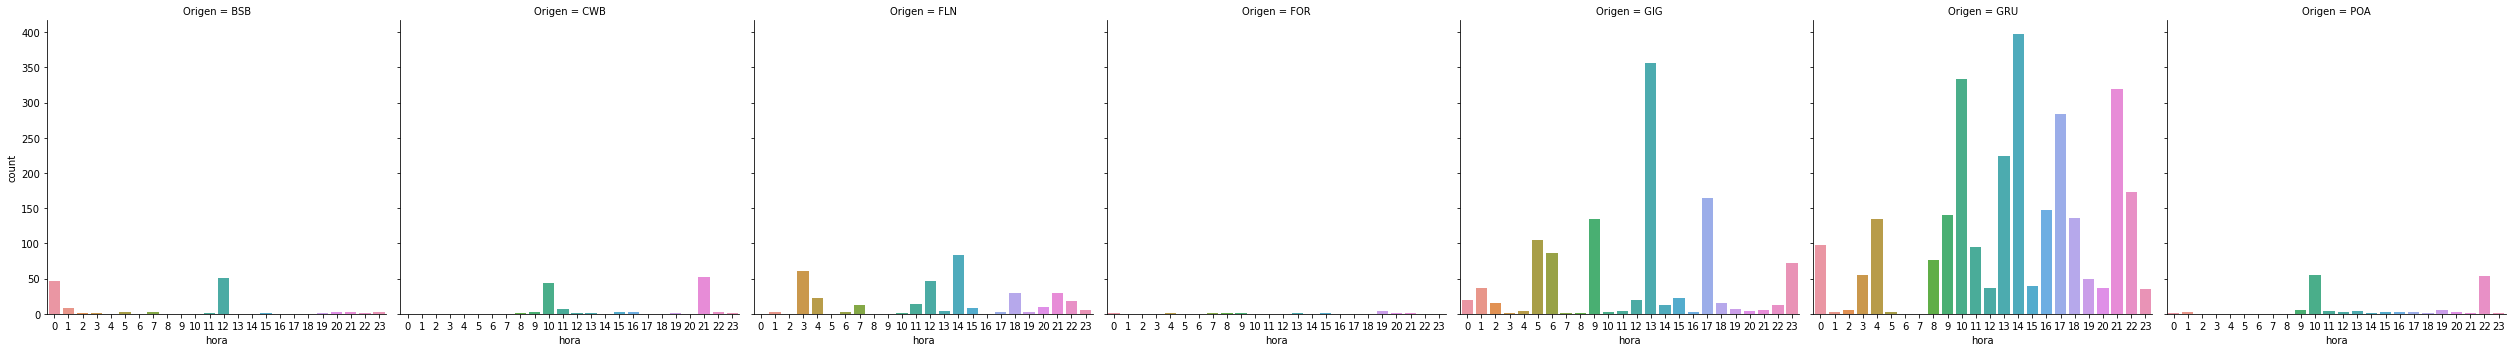

In [55]:
sns.catplot(data=df1, x='hora', y='count', col='Origen', kind='bar')
plt.show()

## **Algoritmos y Modelos**  🔧 ⚙



###Correlación entre variables

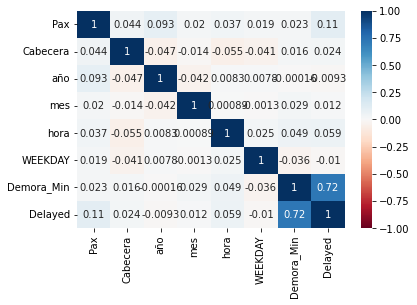

In [56]:
corr = Arg_Res1.loc[:,Arg_Res1.dtypes!='object'].corr() #saca la correlacion de todos los tipos de datos que no sean objeto

sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

###Métricas algoritmos de clasificación

In [57]:
df_Resumen = df_Vuelos[['Pax','año','mes','hora','Rmk']]

X = df_Resumen.drop('Rmk',axis= 1)
y = df_Resumen['Rmk']

X.head()

,Pax,año,mes,hora
0,100.0,2019,1,1
1,36.0,2019,1,6
2,153.0,2019,1,7
3,28.0,2019,1,7
4,146.0,2019,1,7


###Arbol Decisión

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

#Creo un modelo:

modelo = DecisionTreeClassifier(random_state=1)
modelo.fit(X_train, y_train)

#Obtenemos las predicciones:
preds = modelo.predict(X_test) 

In [60]:
#plt.figure(figsize=(10,6))
#metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])
#plt.show()

###Knn

Escalo el DS

In [61]:
scaler = Normalizer()
scaler.fit(X_train) #datos de entrenamiento para saber que escalas vamos a manejar

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)  

**Elijo K:** por la cantidad de variables, elijo k=2

In [62]:
classifier = KNeighborsClassifier(n_neighbors = 2) 
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [63]:
y_pred = classifier.predict(X_test)

In [64]:
y_pred

array(['ATE', 'ATE', 'ATE', ..., 'ATE', 'ATE', 'ATE'], dtype=object)

**Métricas**

In [65]:
print(metrics.classification_report(y_test, preds))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         ATE       1.00      1.00      1.00     25116
         CAN       0.00      0.00      0.00         1

    accuracy                           1.00     25117
   macro avg       0.50      0.50      0.50     25117
weighted avg       1.00      1.00      1.00     25117



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Underfitting-overfitting



In [66]:
preds_train = modelo.predict(X_train) 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [67]:
train_accuracy = metrics.accuracy_score(y_train, preds_train)
train_accuracy 

1.0

In [68]:
preds_test = modelo.predict(X_test) 

test_accuracy = metrics.accuracy_score(y_test, preds_test)
test_accuracy     #cuando la diferencia entre train_accuracy y test_accuracy es muy grande es overfitting

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.999960186327985